In [55]:
#“What is the most likely time of year/time of day to get into an accident?”
#1.  Filter for time year/time of day, get rid of missing values
#2. Create ranges, use the buckets or iloc/loc
#3. Put into a dataframe- It's already a dataframe.
#4. Filter it to show which range has the most crashes

In [56]:
import pandas as pd


In [57]:
csv_path = "Q3_Resources/Motor_Vehicle_Collisions_-_Crashes.csv"
df = pd.read_csv(csv_path)
df.head()

C:\Users\clayt\AppData\Local\Temp\ipykernel_38148\1081833141.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [58]:
#Filter data down to relevant columns
#Alex(TA) helped with this code
crash_date_and_time = df[["CRASH DATE","CRASH TIME"]]
crash_date_and_time

,CRASH DATE,CRASH TIME
0,09/11/2021,2:39
1,03/26/2022,11:45
2,06/29/2022,6:55
3,09/11/2021,9:35
4,12/14/2021,8:13
...,...,...
2033261,09/19/2023,15:55
2033262,09/14/2023,23:15
2033263,09/12/2023,16:00
2033264,09/19/2023,10:45


In [67]:
#Drop rows with missing values (NaN)
crash_date_and_time = crash_date_and_time.dropna()


In [60]:
#Do a count to see how many there are now
crash_date_and_time.count()

CRASH DATE    2033266
CRASH TIME    2033266
dtype: int64

In [61]:
#Create bins for the time of day
#bins = [0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 9:00, 10:00, 
        #11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00 ]
#group_names = ["12am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", 
               #"11am", "12pm" , "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
labels = [str(i)+':00-'+str(i)+':59' for i in range(24)]
bins = list(range(25))    
crash_date_and_time["CRASH TIME"] = pd.to_datetime(crash_date_and_time["CRASH TIME"], format= "%H:%M")
pd.cut(crash_date_and_time["CRASH TIME"].dt.hour,bins,labels=labels)

C:\Users\clayt\AppData\Local\Temp\ipykernel_38148\457958978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_date_and_time["CRASH TIME"] = pd.to_datetime(crash_date_and_time["CRASH TIME"], format= "%H:%M")


0            1:00-1:59
1          10:00-10:59
2            5:00-5:59
3            8:00-8:59
4            7:00-7:59
              ...     
2033261    14:00-14:59
2033262    22:00-22:59
2033263    15:00-15:59
2033264      9:00-9:59
2033265    14:00-14:59
Name: CRASH TIME, Length: 2033266, dtype: category
Categories (24, object): ['0:00-0:59' < '1:00-1:59' < '2:00-2:59' < '3:00-3:59' ... '20:00-20:59' < '21:00-21:59' < '22:00-22:59' < '23:00-23:59']

In [62]:
#Which bin has the most crashes?
#Each entry is itself a crash.

crash_date_and_time["bins"] = pd.cut(crash_date_and_time["CRASH TIME"].dt.hour,bins,labels=labels)
crash_date_and_time["bins"]


C:\Users\clayt\AppData\Local\Temp\ipykernel_38148\2307916267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_date_and_time["bins"] = pd.cut(crash_date_and_time["CRASH TIME"].dt.hour,bins,labels=labels)


0            1:00-1:59
1          10:00-10:59
2            5:00-5:59
3            8:00-8:59
4            7:00-7:59
              ...     
2033261    14:00-14:59
2033262    22:00-22:59
2033263    15:00-15:59
2033264      9:00-9:59
2033265    14:00-14:59
Name: bins, Length: 2033266, dtype: category
Categories (24, object): ['0:00-0:59' < '1:00-1:59' < '2:00-2:59' < '3:00-3:59' ... '20:00-20:59' < '21:00-21:59' < '22:00-22:59' < '23:00-23:59']

In [70]:
# Count the number of crashes in each bin
crash_counts = crash_date_and_time["bins"].value_counts()
crash_counts


bins
15:00-15:59    146828
16:00-16:59    143588
13:00-13:59    135865
14:00-14:59    127316
17:00-17:59    126218
12:00-12:59    117609
11:00-11:59    111911
7:00-7:59      111664
8:00-8:59      107994
10:00-10:59    105244
18:00-18:59    103367
9:00-9:59      100877
19:00-19:59     86347
20:00-20:59     73203
21:00-21:59     66730
6:00-6:59       61542
22:00-22:59     56015
5:00-5:59       45044
0:00-0:59       34976
4:00-4:59       28962
1:00-1:59       26795
3:00-3:59       26644
2:00-2:59       23520
23:00-23:59         0
Name: count, dtype: int64

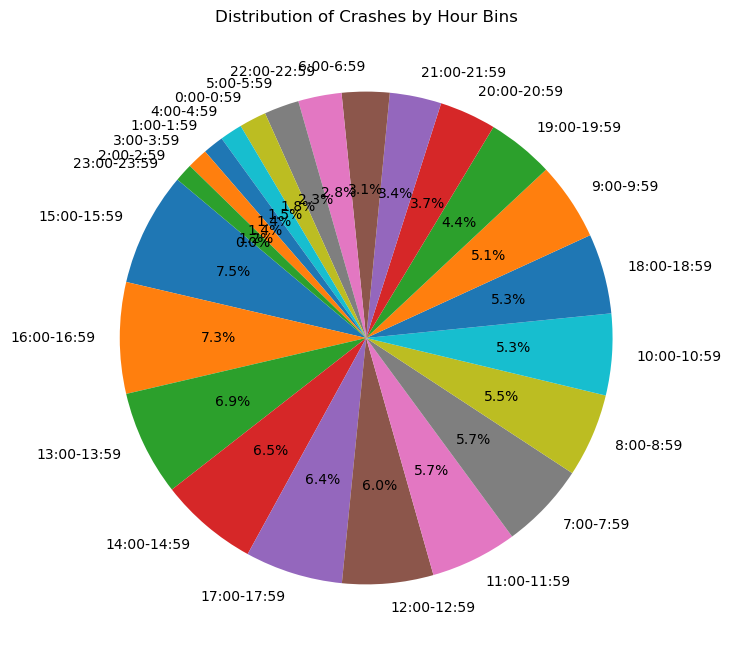

In [64]:
import matplotlib.pyplot as plt

# Create a pie chart


plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(crash_counts, labels=crash_counts.index, autopct='%1.1f%%', startangle=140)

# Set a title
plt.title('Distribution of Crashes by Hour Bins')

# Show the pie chart
plt.show()

In [65]:
#Create a bar chart

#labels
